08:41:39 - cmdstanpy - INFO - Chain [1] start processing
08:41:39 - cmdstanpy - INFO - Chain [1] done processing


date          0
DAU           0
MAU           0
stickiness    0
ds            0
y             0
dtype: int64
date          datetime64[ns]
DAU                    int64
MAU                    int64
stickiness           float64
ds            datetime64[ns]
y                    float64
dtype: object
           ds
67 2025-08-31
68 2025-09-30
69 2025-10-31
70 2025-11-30
71 2025-12-31
           ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
67 2025-08-31  12.921120   13.233017   13.546809    12.754566    13.068316   
68 2025-09-30  12.921126   14.605219   14.940430    12.742510    13.077653   
69 2025-10-31  12.921132   13.963293   14.324334    12.730054    13.091120   
70 2025-11-30  12.921137   13.754288   14.143581    12.714794    13.104323   
71 2025-12-31  12.921144   13.076587   13.495382    12.697104    13.115701   

    additive_terms  additive_terms_lower  additive_terms_upper    yearly  \
67        0.478459              0.478459              0.478459  0.478459  

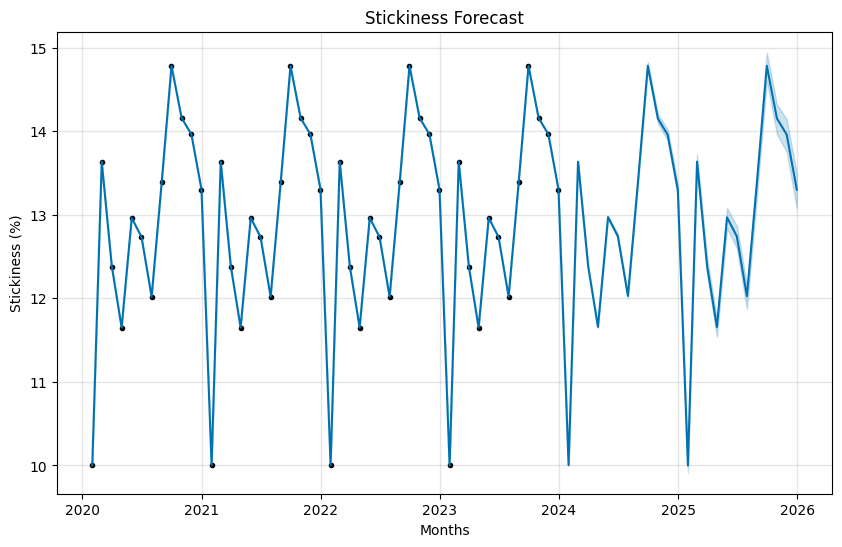

2025 Forecasted Stickiness:
Predicted: 12.92%
Upper Bound: 13.05%
Lower Bound: 12.77%


In [9]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Sample data for demonstration
data = {
    'date': pd.date_range(start='2020-01-01', end='2023-12-31', freq='M'),
    'DAU': [100, 150, 130, 120, 140, 135, 125, 150, 170, 160, 155, 145]*4,
    'MAU': [1000, 1100, 1050, 1030, 1080, 1060, 1040, 1120, 1150, 1130, 1110, 1090]*4
}
df = pd.DataFrame(data)

# Calculate stickiness as a percentage
df['stickiness'] = (df['DAU'] / df['MAU']) * 100
df['ds'] = df['date']
df['y'] = df['stickiness']

# Check for missing values and data types
print(df.isnull().sum())
print(df.dtypes)

# Initialize and fit the model
model = Prophet(daily_seasonality=False, weekly_seasonality=False, yearly_seasonality=True)
model.fit(df[['ds', 'y']])

# Create a dataframe for future dates
future = model.make_future_dataframe(periods=24, freq='M')  # Forecast for the next 24 months (2 years)
print(future.tail())  # Check the future dataframe to ensure it includes dates for 2025

# Generate the forecast
forecast = model.predict(future)

# Check the forecast dataframe to ensure it includes predictions for 2025
print(forecast.tail())

# Plot forecast
fig, ax = plt.subplots(figsize=(10, 6))
model.plot(forecast, ax=ax)
ax.set_title('Stickiness Forecast')
ax.set_xlabel('Months')
ax.set_ylabel('Stickiness (%)')
plt.show()

# Extracting predicted values and intervals for the year 2025
forecast_2025 = forecast[forecast['ds'].dt.year == 2025]
if not forecast_2025.empty:
    predicted_2025 = forecast_2025['yhat']
    upper_bound_2025 = forecast_2025['yhat_upper']
    lower_bound_2025 = forecast_2025['yhat_lower']

    print("2025 Forecasted Stickiness:")
    print(f"Predicted: {predicted_2025.mean():.2f}%")
    print(f"Upper Bound: {upper_bound_2025.mean():.2f}%")
    print(f"Lower Bound: {lower_bound_2025.mean():.2f}%")
else:
    print("No forecast data available for 2025.")
